# Term Deposit Sale prediction with Ensemble - Random forrest classifier

Objective :In a campaign , total 45211 customers were contacted and few of them shown intrest and many of them not. Based on given dataset , We need to build a model to predict which customre will respond to campaign for "Term loan" based on given independent variables. 

Importing all important packages.

In [178]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
import seaborn as sns

Now importing given dataset in dataframe df_bank .

In [179]:
df_bank=pd.read_csv('bank-full.csv')

In [180]:
df_bank.shape

(45211, 17)

In [181]:
df_bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


So there are total 45211 records are there and total 17 columns exist.

Now checking first 5 records of dataset.

In [4]:
df_bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Step-1 : EDA - Univariate analysis

Let us first check summarized information about dataset :

df_bank_label DF was converted into all integer dataset after converting DF types object.

In [10]:
df_bank_label.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,4.339762,3.272657,0.0,1.0,4.0,7.0,11.0
marital,45211.0,1.167725,0.608230,0.0,1.0,1.0,2.0,2.0
education,45211.0,1.224813,0.747997,0.0,1.0,1.0,2.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,0.640242,0.897951,0.0,0.0,0.0,2.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


From above output , we can have below interpretations :
    (1) None of the variables had NaN data.
    (2) Age varies from 18 years to 95 years and distribution is right skewed as delta between 75% & Max is much higher than delta between 25% to minimum.
    (3) Minimum balance is in negetive euros .
    (4) Most of the customer have conversation suration as 180 seconds and which is also right skewed.
    (5) At maximum customers are contacted 63 times during campaign.
    

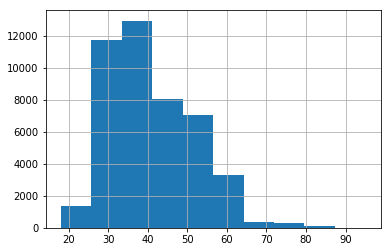

In [182]:
df_bank['age'].hist()

From above age histogram , We can see that most of the customers are of age between 28 - 40 years and overall distribution is right skewed. There are some customers but very few of age above 65 years also.

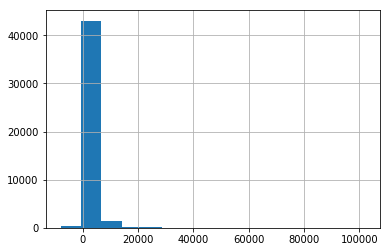

In [23]:
df_bank['balance'].hist(bins=15)

As visible above that most of the customer has balance between 0 to 10000 euros.

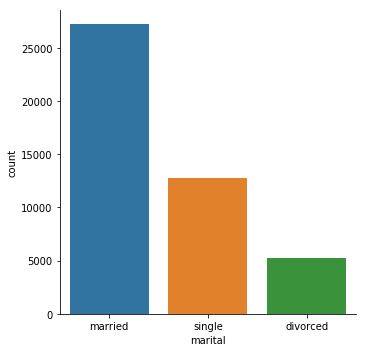

In [36]:
#df_bank['marital'].hist()
sns.catplot(x="marital", kind="count", data=df_bank);

Maximum people our dataset are married and few are divorced too.

C:\Users\rashmi\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


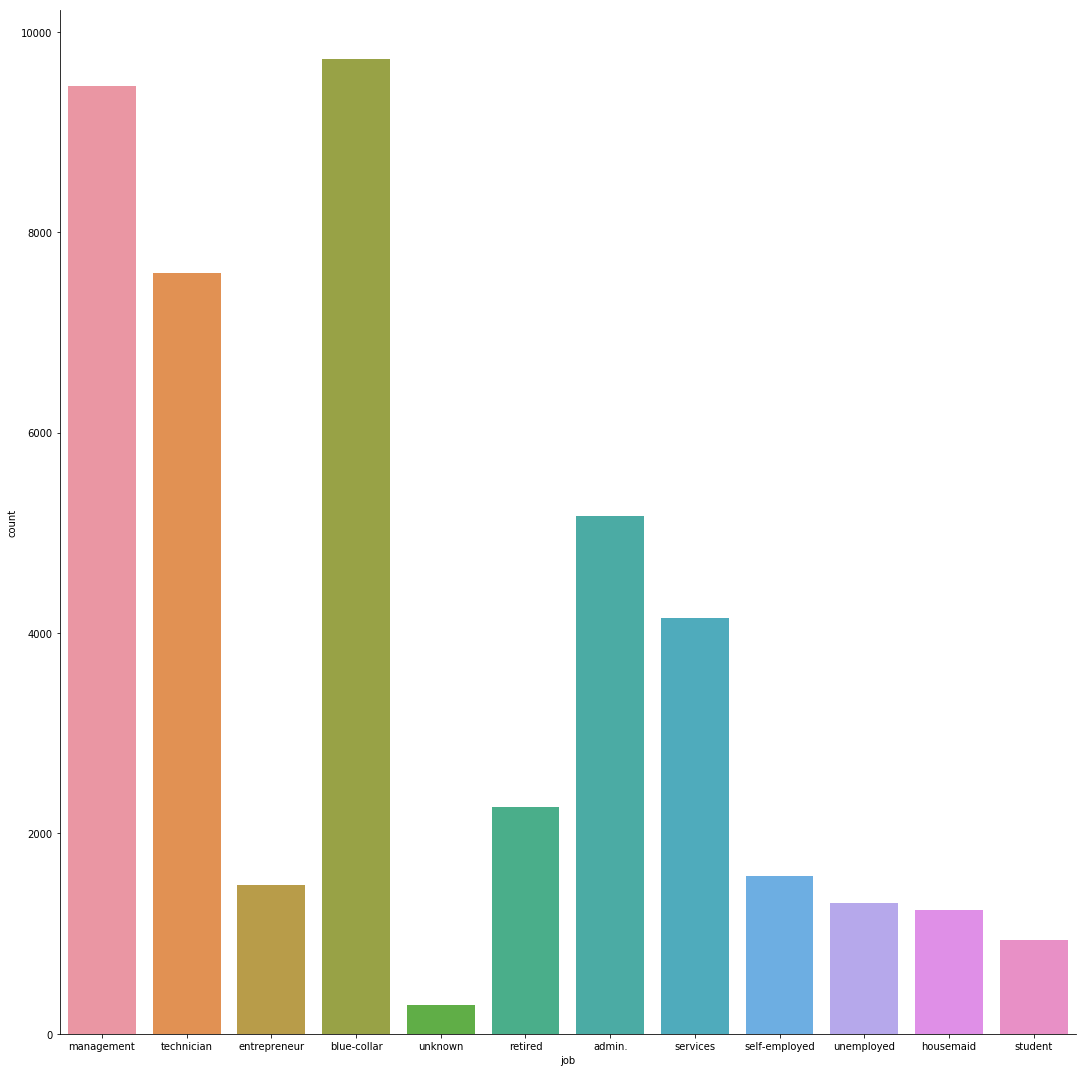

In [40]:
sns.catplot(x="job", kind="count", data=df_bank, size=15);

In our dataset we can clearly see from above plot that maximum customers are blue collar,management,technician , adminm service and retired.

C:\Users\rashmi\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


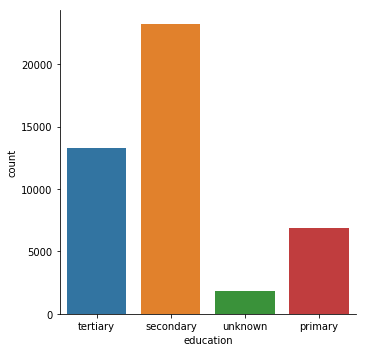

In [44]:
sns.catplot(x="education", kind="count", data=df_bank, size=5);

Most of the customers in our dataset are educated upto "secondary" followed by tertiary , primary and unknown categories.

C:\Users\rashmi\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


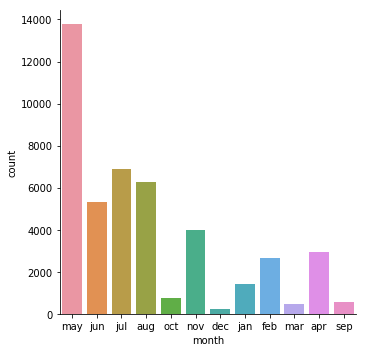

In [45]:
sns.catplot(x="month", kind="count", data=df_bank, size=5);

Maximum people were contacted on may month.

C:\Users\rashmi\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


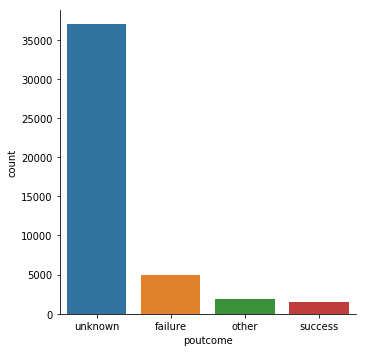

In [46]:
sns.catplot(x="poutcome", kind="count", data=df_bank, size=5);

So from above plot , it is very much visible that outcome of previous campaign is not known , hence unknown has that maximum frequency in data.

# Step-2) EDA : Bivariate analysis and Multivariate analysis

To start bivariate analysis , let us quickly check correlation matrix

In [53]:
corr = df_bank_label.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1,-0.022,-0.4,-0.11,-0.018,0.098,-0.19,-0.016,0.026,-0.0091,-0.042,-0.0046,0.0048,-0.024,0.0013,0.0074,0.025
job,-0.022,1,0.062,0.17,-0.0069,0.018,-0.13,-0.033,-0.082,0.023,-0.093,0.0047,0.0068,-0.024,-0.00091,0.011,0.04
marital,-0.4,0.062,1,0.11,-0.007,0.0021,-0.016,-0.047,-0.039,-0.0053,-0.007,0.012,-0.009,0.019,0.015,-0.017,0.046
education,-0.11,0.17,0.11,1,-0.011,0.065,-0.091,-0.049,-0.11,0.023,-0.057,0.0019,0.0063,5.2e-05,0.018,-0.019,0.066
default,-0.018,-0.0069,-0.007,-0.011,1,-0.067,-0.006,0.077,0.015,0.0094,0.011,-0.01,0.017,-0.03,-0.018,0.035,-0.022
balance,0.098,0.018,0.0021,0.065,-0.067,1,-0.069,-0.084,-0.027,0.0045,0.02,0.022,-0.015,0.0034,0.017,-0.021,0.053
housing,-0.19,-0.13,-0.016,-0.091,-0.006,-0.069,1,0.041,0.19,-0.028,0.27,0.0051,-0.024,0.12,0.037,-0.1,-0.14
loan,-0.016,-0.033,-0.047,-0.049,0.077,-0.084,0.041,1,-0.011,0.011,0.022,-0.012,0.01,-0.023,-0.011,0.015,-0.068
contact,0.026,-0.082,-0.039,-0.11,0.015,-0.027,0.19,-0.011,1,-0.028,0.36,-0.021,0.02,-0.24,-0.15,0.27,-0.15
day,-0.0091,0.023,-0.0053,0.023,0.0094,0.0045,-0.028,0.011,-0.028,1,-0.006,-0.03,0.16,-0.093,-0.052,0.083,-0.028


Insights from above plots are :
    (1) With respect to Target variable highest correlation value was 0.39 which is with "duration" that means duration has some impact on customer's behaviour.
    (2) However "pdays" and "previous" correlated with each i.e. 0.45 correlation value that means number of contacts performed in before the compaign and number of days passed by after client was contacted make.
    (3) Variable Age and marital also have good correlation.

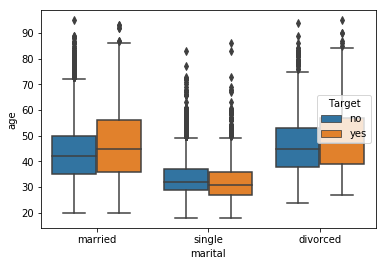

In [24]:
sns.boxplot(df_bank['marital'], df_bank['age'], hue=df_bank['Target'])

Above plot is showing relationship between variable marital, Target & age.
> It is visible from the plot that , people who responded positive to term loan are very narrow in segment i.e. from 28-35 years aprox and there are some outliers also who are single but having age more than 50 and responded positive to term loan campaign.
> median age of people who positively responded to campaign are almost same for married and divorced people.

In [183]:
from pandas import pivot_table

In [184]:
table1 = pivot_table(df_bank, values='balance', index=['Target'],columns=['job'], aggfunc=np.median)
table1

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
Target,,,,,,,,,,,,
no,383.5,376.0,345.5,382.0,532.0,647.0,505.5,323.0,502.0,390.0,495.0,671.5
yes,602.0,566.5,606.0,976.0,925.0,1401.0,814.0,473.0,502.0,712.5,815.5,877.0


From above table we have got the insights that :
> customer who have responded "yes" and are retired are keeping highest balance in account i.e. meadian 1401 euros.
> In all categories of "job" , customer who have responded "yes" are having more balance than those who have responded "No".
> There is unkown category also in job variable.

Finding the relationship between Target and housing variable.

In [185]:
Target_vs_housing = pd.crosstab(index=df_bank["Target"], 
                            columns=df_bank["housing"],
                             margins=True) 
Target_vs_housing

Target_vs_housing.columns = ["Housing-no","Housing-yes","rowtotal"]
Target_vs_housing.index= ["Target-no","Target-yes","coltotal"]
Target_vs_housing/Target_vs_housing.ix["coltotal","rowtotal"]*100

C:\Users\rashmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Housing-no,Housing-yes,rowtotal
Target-no,36.997633,51.303886,88.30152
Target-yes,7.418549,4.279932,11.69848
coltotal,44.416182,55.583818,100.00000


From above crosstab , we can have below insights :
> Overall in our dataset there are 88.3% customer who respomded "no" and 11.69% customers who responded "Yes" .
> There are 7.4% people who have responded "yes" and having not having housing loan whereas same is 4.2% when people are having housing loan.

Finding the relationship between Target and duration variable.

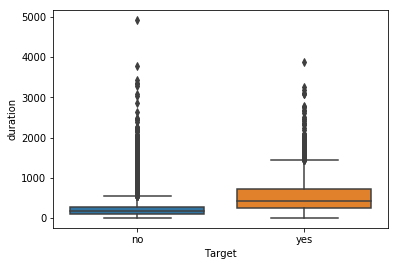

In [186]:
sns.boxplot(df_bank['Target'], df_bank['duration'])

From above plot , it is quite visible that people who responded "Yes" have talked for more duration than who responded "No" , hence Target is correlated high with duration.
There are some outliers in both cases.


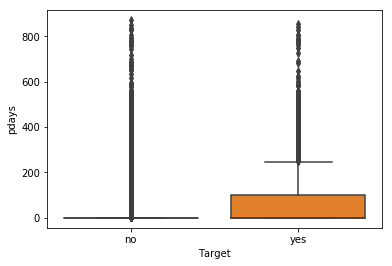

In [187]:
sns.boxplot(df_bank['Target'], df_bank['pdays'])

Pdays are higher in case of those customers who responded "Yes". And here also there are some outliers in both yes and no cases.

Now finding the relationship between contact and Target variable.

In [188]:
Target_vs_contact = pd.crosstab(index=df_bank["Target"], 
                            columns=df_bank["contact"],
                             margins=True) 
Target_vs_contact

Target_vs_contact.columns = ["Cellular","Telephone","unknown","rowtotal"]
Target_vs_contact.index= ["Target-no","Target-yes","coltotal"]
Target_vs_contact/Target_vs_contact.ix["coltotal","rowtotal"]*100

C:\Users\rashmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Cellular,Telephone,unknown,rowtotal
Target-no,55.110482,5.565017,27.626020,88.30152
Target-yes,9.663577,0.862622,1.172281,11.69848
coltotal,64.774059,6.427639,28.798301,100.00000


Clearly visible from above cross table that people who were contacted through cellular responded much higher (9.67%) than any other contact mode.

# Data cleaning

We have some categories as "unknown" under features like education, job , contact and poutcome.

Case-1) Handling "unknown" category for "education" variable :

In [189]:
Edu_vs_age = pivot_table(df_bank, values='age', index=['education'], aggfunc=np.median)
Edu_vs_age

,age
education,
primary,45
secondary,38
tertiary,37
unknown,45


Since median age of unknown and primary is almost same , let us replace "unkown" with "primary".

In [190]:
x = {'primary':'primary','secondary':'secondary','tertiary':'tertiary','unknown':'primary'}
df_bank['education'] = df_bank['education'].map(x)

Case-2) Handling of "unknown" job category

Let us first check how much %age of records are "unknown" in job category :

In [191]:
df_bank['job'].value_counts()/45211*100

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64

In [ ]:
only 0.6% records are showing unknown job category , hence we can drop these records from our dataset.

In [192]:
df_bank = df_bank.drop(df_bank[df_bank.job == 'unknown'].index)

In [193]:
df_bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

Case-3) Handling "unknown" category in "contact" 

Let us find out the probablity of each contact type :

In [194]:
df_bank.shape

(44923, 17)

In [195]:
df_bank['contact'].value_counts()/44923*100

cellular     64.897714
unknown      28.735837
telephone     6.366449
Name: contact, dtype: float64

64% record has contact type as "cellular" so we can replace unknown with cellular.

In [196]:
y = {'cellular':'cellular','unknow':'cellular','telephone':'telephone'}
df_bank['contact'] = df_bank['contact'].map(y)
df_bank['contact'].value_counts()

cellular     29154
telephone     2860
Name: contact, dtype: int64

Case-4) We also see some "unknown" category in poutcome

In [197]:
df_bank['poutcome'].value_counts()

unknown    36704
failure     4881
other       1838
success     1500
Name: poutcome, dtype: int64

Since, distribution shows maximum outcomes were "unknown" and we dont have any correlation of this with other category, so I will leave this as one category "unknown" only.

# Creating a decision tree model

In [198]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44923 entries, 0 to 45210
Data columns (total 17 columns):
age          44923 non-null int64
job          44923 non-null object
marital      44923 non-null object
education    44923 non-null object
default      44923 non-null object
balance      44923 non-null int64
housing      44923 non-null object
loan         44923 non-null object
contact      32014 non-null object
day          44923 non-null int64
month        44923 non-null object
duration     44923 non-null int64
campaign     44923 non-null int64
pdays        44923 non-null int64
previous     44923 non-null int64
poutcome     44923 non-null object
Target       44923 non-null object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


Decision tree cannot work with data type "object" , hence same needs to be converted into categorical with each distinct value becoming a category or code.

In [199]:
df_bank_label=df_bank

for feature in df_bank_label.columns: # Loop through all columns in the dataframe
    if df_bank_label[feature].dtype == 'object': # Only apply for columns with categorical strings
        df_bank_label[feature] = pd.Categorical(df_bank_label[feature]).codes # Replace strings with an integer

In [200]:
# Now let us check DF info
df_bank_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44923 entries, 0 to 45210
Data columns (total 17 columns):
age          44923 non-null int64
job          44923 non-null int8
marital      44923 non-null int8
education    44923 non-null int8
default      44923 non-null int8
balance      44923 non-null int64
housing      44923 non-null int8
loan         44923 non-null int8
contact      44923 non-null int8
day          44923 non-null int64
month        44923 non-null int8
duration     44923 non-null int64
campaign     44923 non-null int64
pdays        44923 non-null int64
previous     44923 non-null int64
poutcome     44923 non-null int8
Target       44923 non-null int8
dtypes: int64(7), int8(10)
memory usage: 3.2 MB


In [201]:
# capture the target column ("default") into separate vectors for training set and test set

X = df_bank_label.drop("Target" , axis=1)

y = df_bank_label.pop("Target")

df_bank_label.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [202]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [203]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. 
#Restricting the depth of the tree to 5 (no particular reason for selecting this)

#dt_model = DecisionTreeClassifier(criterion = 'entropy' , random_state = 100)
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [204]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [205]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

# Checking variable importance
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                Imp
age        0.093402
job        0.037574
marital    0.018606
education  0.019902
default    0.001084
balance    0.107495
housing    0.026162
loan       0.008385
contact    0.042077
day        0.082810
month      0.093749
duration   0.298720
campaign   0.031361
pdays      0.079498
previous   0.011158
poutcome   0.048018


In [162]:
y_predict = dt_model.predict(X_test)

In [210]:
print(dt_model.score(X_train , train_labels))
print(dt_model.score(X_test , test_labels))

1.0
0.8722267566965942


From above scores , we can clearly see that our decision tree got overfit.

In [213]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[11027   871]
 [  860   719]]


there are total 860+871 =1731 misclassifications.

Now let us tune some hyperparameter and check if stats for the same has changed :

In [214]:
dt_model_tune = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)

In [236]:
from sklearn.metrics import f1_score , precision_score,recall_score
from sklearn.metrics import accuracy_score

In [228]:
dt_model_tune.fit(X_train, train_labels)
y_predict = dt_model.predict(X_test)
print(dt_model_tune.score(X_train , train_labels))
print(dt_model_tune.score(X_test , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))

0.9013547033008967
0.8978259256511093
[[11037   861]
 [  861   718]]


Now we can see that , there is not much difference in train and test accuracy and accuracy improved in tuned model by more than 2%.
misclassification reduced from 1731 to 1722.

In [240]:
print("f1_score -", f1_score(test_labels, y_predict))
print("precision - ",precision_score(test_labels, y_predict))
print("recall- ",recall_score(test_labels, y_predict))

f1_score - 0.45471817606079795
precision -  0.45471817606079795
recall-  0.45471817606079795


f1_score , precision and recall are not at par due to maximum misclassification in class-Yes.

So, Hyper parameter tuned model which is having max_depth=5 showing score 90% in training and 89.7% in testing, Now we can say that it is not an overfit model.

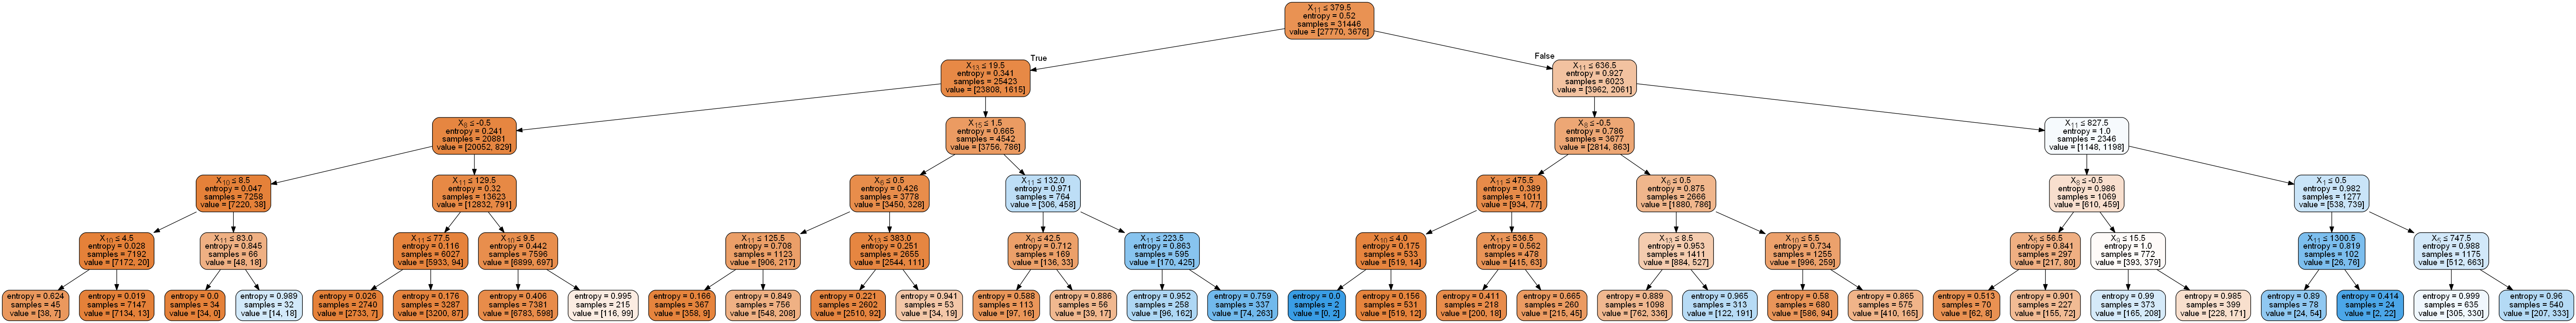

In [217]:
# Draw decision tree 

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_model_tune, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


# Random forest classification

Now let us try with Random forest as ensemble algorithm

In [250]:
# Importing packages

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

In [256]:
# Instantiating RF classifier function
rfcl = RandomForestClassifier(n_estimators = 10)

# fitting training data
rfcl = rfcl.fit(X_train, train_labels)

In [257]:
# Now predict test labels based on above fitted model

y_predict = rfcl.predict(X_test)

# Let's check accuracy scores 
print(rfcl.score(X_train , train_labels))
print(rfcl.score(X_test , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))

0.9915092539591681
0.8975291236922164
[[11532   366]
 [ 1015   564]]


Above accuracy indicates overfit scenario because train was showing accuracy of 99% but test data is only 89% accurate.

Trying to check best hyper parameter settings with grid search algorithm

In [283]:
param_grid = { 
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [5,7,9,11],
    'criterion' :['entropy'],
}

In [286]:
CV_rfc = GridSearchCV(estimator=rfcl, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, train_labels)

In [268]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'auto',
 'n_estimators': 300}

So above shown hyper parameters are best settings to fit a model.

In [292]:
rfc2=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 300, max_depth=11, criterion='entropy')
rfc2.fit(X_train,train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [293]:
from sklearn.metrics import classification_report

In [294]:
y_predict = rfc2.predict(X_test)
print(rfc2.score(X_train , train_labels))
print(rfc2.score(X_test , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))

0.9387521465369204
0.9029457594420123
[[11655   243]
 [ 1065   514]]


Now our model accuracy looks stable, there is not much difference in train and test accuracy.

Misclassification reduced from 1722 (in decision tree) to 1065+243=1308.

In [295]:
print("f1_score -", f1_score(test_labels, y_predict))
print("precision - ",precision_score(test_labels, y_predict))
print("recall- ",recall_score(test_labels, y_predict))
print(classification_report(test_labels, y_predict))

f1_score - 0.44006849315068497
precision -  0.678996036988111
recall-  0.32552248258391386
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11898
           1       0.68      0.33      0.44      1579

   micro avg       0.90      0.90      0.90     13477
   macro avg       0.80      0.65      0.69     13477
weighted avg       0.89      0.90      0.89     13477



Precision for both classes are acceptable but recall for class-1 is 0.33 whereas same is 0.98 for class-0.

Another observation here is that our dataset is highly imbalanced i.e. 88.3% class-0 and 11.69% class-1. Let us try to set class_weight=balanced :

In [296]:
rfc3=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=9, criterion='entropy', class_weight="balanced")
rfc3.fit(X_train,train_labels)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=9, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=False)

In [297]:
y_predict = rfc3.predict(X_test)
print(rfc3.score(X_train , train_labels))
print(rfc3.score(X_test , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))

0.8559117216816129
0.8423981598278548
[[10061  1837]
 [  287  1292]]


Prediction accuracy has degraded to 84% from 90% in test dataset.

In [298]:
print("f1_score -", f1_score(test_labels, y_predict))
print("precision - ",precision_score(test_labels, y_predict))
print("recall- ",recall_score(test_labels, y_predict))
print(classification_report(test_labels, y_predict))

f1_score - 0.5488530161427359
precision -  0.4129114733141579
recall-  0.818239392020266
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     11898
           1       0.41      0.82      0.55      1579

   micro avg       0.84      0.84      0.84     13477
   macro avg       0.69      0.83      0.73     13477
weighted avg       0.91      0.84      0.86     13477



Though recall has improved drastically and precison degraded but misclassifications have increased as per confusion matrix , So I will consider my randomforest model with accuracy of 90.29% in test having below hyper parameters set :

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'auto',
 'n_estimators': 300}